<a href="https://colab.research.google.com/github/angelotc/Decomposition-of-Retail-Companies/blob/master/FriedmanIsoForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn import model_selection 
import numpy as np

In [ ]:
# Helper functions

def add_y_as_feature(X,y):
  y = np.reshape(y,(len(y),1))
  return np.concatenate((X,y), axis=1)

def copy_and_add_noise_rows(df,):
  pass

In [ ]:
# Create synthetic dataset using make_friedman1. N = 100k

X, y = make_friedman1(
    n_samples=1000, n_features = 5 , random_state=1)

X.shape,y.shape

((1000, 5), (1000,))

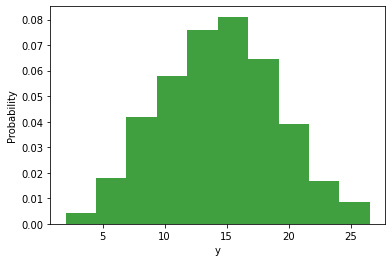

In [ ]:
from matplotlib import pyplot as plt
n_bins = 10
# We can set the number of bins with the `bins` kwarg

plt.xlabel('y')
plt.ylabel('Probability')
n, bins, patches = plt.hist(y, bins=n_bins, density=True, facecolor='g', alpha=0.75)

In [ ]:

X = add_y_as_feature(X,y)
X[0]

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 1.68522049e+01])

In [ ]:
# Divide 10% of the dataset as the test set ; 90% of the dataset into a training set. 

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)

# we don't really need y_test or y_train...

In [ ]:
# Instantiate model -> fit -> predict using test set.
# Note on contamination parameter: This is a parameter that the algorithm is quite sensitive to; it refers to the expected 
# proportion of outliers in the data set. This is used when fitting to define the threshold on the scores of the samples.

clf = IsolationForest(max_samples=0.5, contamination = 0, bootstrap = True )
clf.fit(X_train)
y_pred_test = clf.predict(X_test)

In [ ]:
pd.DataFrame(y_pred_test).value_counts()

1    10000
dtype: int64

The above says that only 2 of the 10k test set samples are found as outliers. Of course, these 2 are false-positives, since they are  generated by the formula of Friedman formula:


y(X) = 10 * sin(pi * X[:, 0] * X[:, 1]) + 20 * (X[:, 2] - 0.5) ** 2 + 10 * X[:, 3] + 5 * X[:, 4] + noise * N(0, 1).

##Everything below is experimental:

In [ ]:
# Increasing features from 5->50? Only first 5 variables are correlated, so what if we add more independent variables. Would that change our predictions?
for i in range (5,10):
  X, y = make_friedman1(
    n_samples=100000, n_features = i,  noise=0.1, random_state=1)
  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.1, random_state=42)
  clf = IsolationForest(max_samples='auto', contamination = 0)
  clf.fit(X_train)
  y_pred_test = clf.predict(X_test)
  print(i, pd.DataFrame(y_pred_test).value_counts())

In [ ]:
# Doesn't look like it!